In [1]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Membaca data
data = pd.read_csv("C:/Users/hp/Downloads/240924 - Data Clean Toner - Versi7.csv")
data.head()

,linkproduk,harga,produkterjual,daerah,namaproduk,provinsi,merek,cashbackkoin,voucher(%)
0,https://www.lazada.co.id/products/orange-natur...,33000,4000,Kota Jakarta Barat,orange naturaworld natura beauty spray with dn...,DKI Jakarta,Natura,0,0
1,https://www.lazada.co.id/products/big-size-mir...,21000,2500,Kab. Bogor,mireya in miracle brightening face and body toner,Jawa Barat,Unknown,210,0
2,https://www.lazada.co.id/products/toner-af-dwo...,45000,186,Kota Makassar,toner af dwoble glow,Sulawesi Selatan,Unknown,0,0
3,https://www.lazada.co.id/products/viva-air-maw...,6500,3600,Kab. Bekasi,viva air mawar value product,Jawa Barat,Viva,0,0
4,https://www.lazada.co.id/products/toner-collag...,12000,297,Kota Jakarta Barat,toner collagen glowing toner colagen,DKI Jakarta,Unknown,600,0


In [2]:
print("\nJumlah Missing Value:")
print(data.isnull().sum())


Jumlah Missing Value:
linkproduk       0
harga            0
produkterjual    0
daerah           0
namaproduk       0
provinsi         0
merek            0
cashbackkoin     0
voucher(%)       0
dtype: int64


In [3]:
print("\nStatistik Deskriptif Kolom Numerik")
print(data.describe())


Statistik Deskriptif Kolom Numerik
              harga  produkterjual   cashbackkoin   voucher(%)
count  2.036000e+03    2036.000000    2036.000000  2036.000000
mean   4.748069e+04    1346.760314    1020.972004     9.890472
std    2.270327e+05    8303.583758    7210.036427    18.522190
min    1.000000e+03      50.000000       0.000000     0.000000
25%    1.483725e+04      89.000000       0.000000     0.000000
50%    2.850000e+04     169.000000     152.500000     0.000000
75%    5.099925e+04     456.500000     900.000000    11.000000
max    9.999999e+06  233800.000000  315000.000000    80.000000


In [4]:
# Segmentasi berdasarkan merek produk
merek = data['merek'].value_counts()
print('\nMerek Toner:\n', merek)


Merek Toner:
 merek
Unknown         1053
Viva             162
Clean            100
Wardah            80
Ms Glow           59
                ... 
Oasea              1
Ertos              1
True To Skin       1
Lumiwhite          1
Innisfree          1
Name: count, Length: 63, dtype: int64


In [5]:
# Segmentasi berdasarkan merek produk
merek = data['merek'].value_counts()
print('\nMerek Toner:\n', merek)


Merek Toner:
 merek
Unknown         1053
Viva             162
Clean            100
Wardah            80
Ms Glow           59
                ... 
Oasea              1
Ertos              1
True To Skin       1
Lumiwhite          1
Innisfree          1
Name: count, Length: 63, dtype: int64


In [6]:
# Menghitung kuartil
quartiles = data['harga'].quantile([0, 0.33, 0.66, 1.0]).values

# Menentukan label untuk tiap segmen harga
labels = [
    f"Murah ({quartiles[0]:.0f}-{quartiles[1]:.0f})",
    f"Sedang ({quartiles[1]:.0f}-{quartiles[2]:.0f})",
    f"Mahal ({quartiles[2]:.0f}-{quartiles[3]:.0f})"
]

# Menggunakan pd.qcut untuk membagi data 'harga' menjadi 3 segmen
data['segmen_harga'] = pd.qcut(data['harga'], q=3, labels=labels)

# Menampilkan hasil segmentasi berdasarkan harga
print('\nSegmen Harga:\n', data['segmen_harga'].value_counts())


Segmen Harga:
 segmen_harga
Murah (1000-19638)       686
Sedang (19638-39900)     675
Mahal (39900-9999999)    675
Name: count, dtype: int64


C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

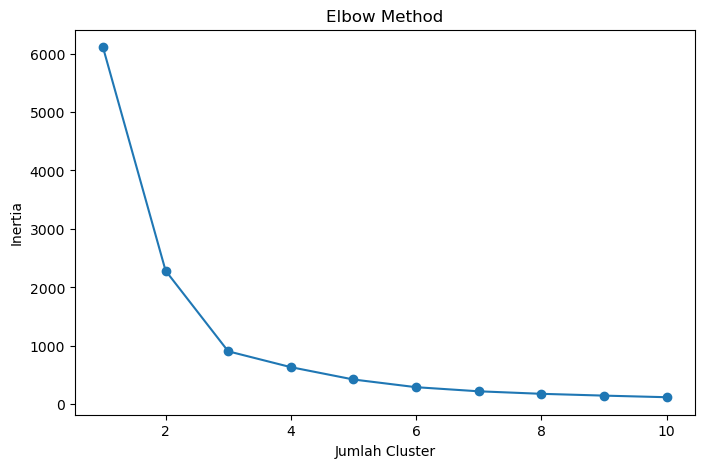

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Fitur yang digunakan untuk clustering
features = data[['harga', 'produkterjual', 'cashbackkoin']]

# Normalisasi data dengan StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Menentukan jumlah cluster (k) menggunakan metode elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Visualisasi elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

In [8]:
from sklearn.cluster import KMeans

# Mengelompokkan data ke dalam 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Menampilkan hasil cluster
print(data[['harga', 'produkterjual', 'cashbackkoin', 'cluster']].head())

   harga  produkterjual  cashbackkoin  cluster
0  33000           4000             0        0
1  21000           2500           210        0
2  45000            186             0        0
3   6500           3600             0        0
4  12000            297           600        0


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


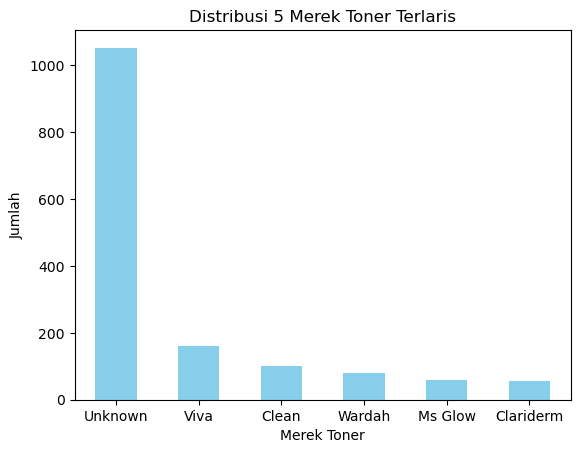

In [9]:
# Menampilkan merek toner yang terlaris
top_5_merek = merek.head(6)

# Visualisasi distribusi 5 merek toner terlaris
top_5_merek.plot(kind='bar', color='skyblue')
plt.title('Distribusi 5 Merek Toner Terlaris')
plt.xlabel('Merek Toner')
plt.ylabel('Jumlah')
plt.xticks(rotation=360)
plt.show()

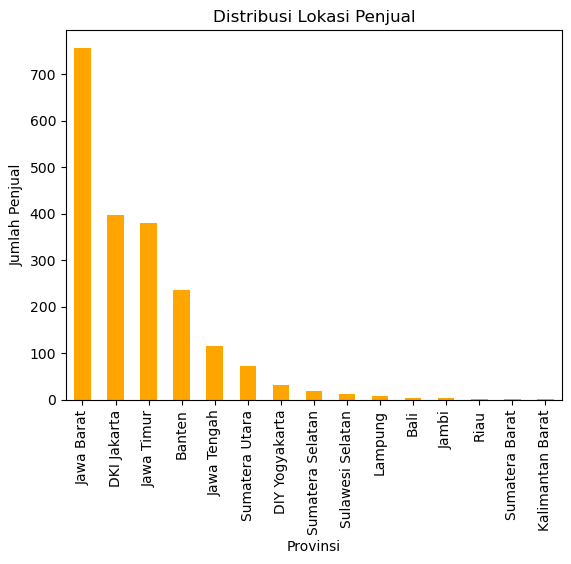

In [10]:
import matplotlib.pyplot as plt

# Menghitung jumlah penjual berdasarkan provinsi
lokasi_penjual = data['provinsi'].value_counts()

# Visualisasi distribusi lokasi penjual
lokasi_penjual.plot(kind='bar', color='orange')
plt.title('Distribusi Lokasi Penjual')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Penjual')
plt.xticks(rotation=90)
plt.show()

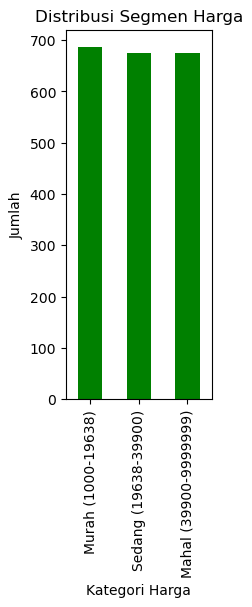

In [11]:
# Visualisasi distribusi segmen harga
plt.subplot(1, 3, 3)
data['segmen_harga'].value_counts().plot(kind='bar', color='green')
plt.title('Distribusi Segmen Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah')
plt.show()

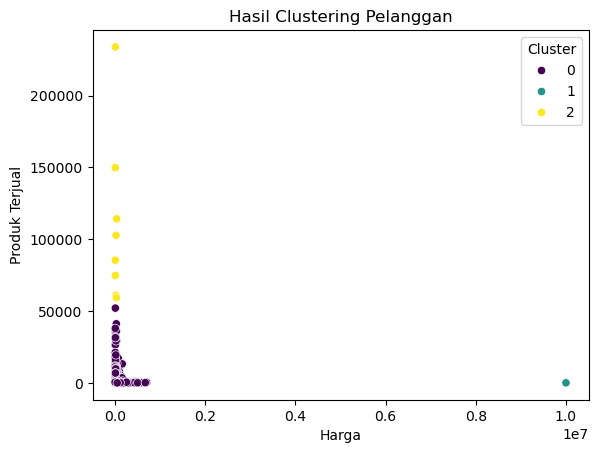

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=data['harga'],
                y=data['produkterjual'],
                hue=data['cluster'], 
                palette='viridis')
plt.title('Hasil Clustering Pelanggan')
plt.xlabel('Harga')
plt.ylabel('Produk Terjual')
plt.legend(title='Cluster')
plt.show()

1. Cluster 0 (Warna Ungu)
Karakteristik: Pelanggan dalam cluster ini membeli produk dalam jumlah rendah hingga sedang, dengan harga produk yang cenderung lebih rendah. Hal ini menunjukkan bahwa pelanggan di cluster ini lebih memilih transaksi dengan nilai kecil.
2. Cluster 1 (Warna Biru)
Karakteristik: Pelanggan dalam cluster ini membeli produk dalam jumlah besar, namun harga produk tetap relatif rendah. Mereka menunjukkan perilaku belanja yang aktif namun hemat.
3. Cluster 2 (Warna Kuning)
Karakteristik: Pelanggan dalam cluster ini membeli produk dengan harga yang sangat tinggi, tetapi jumlah produk yang dibeli relatif sedikit. Ini menunjukkan bahwa mereka lebih memilih produk premium dan berkualitas tinggi.